이탤릭체 텍스트#**깃 허브 개념**

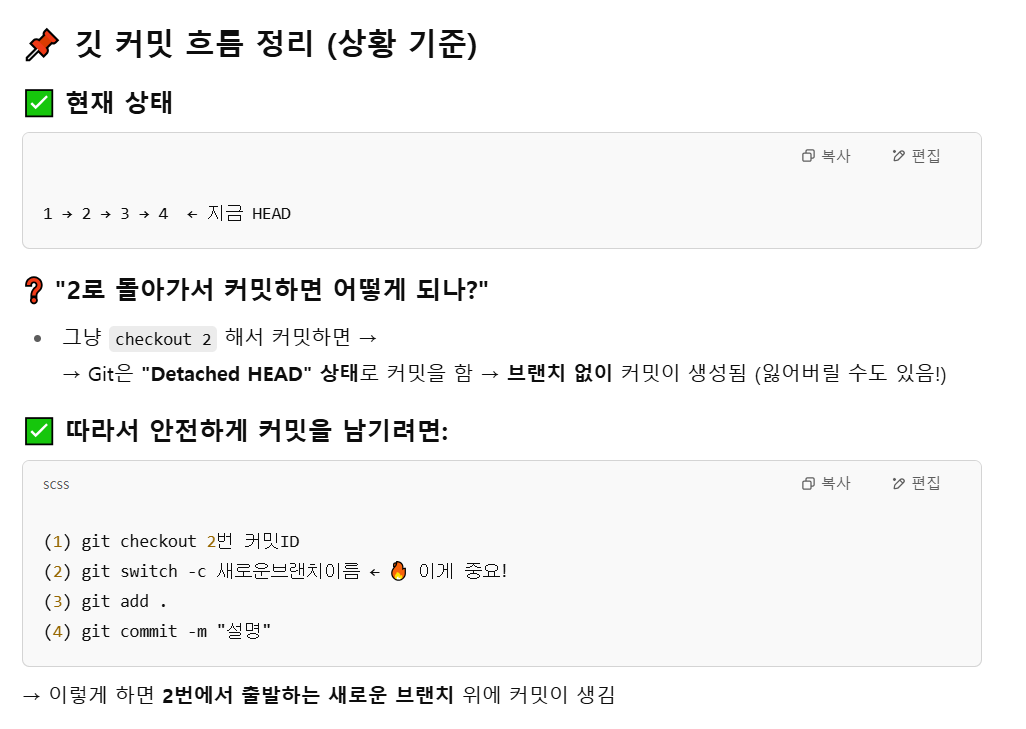

# **git log확인**

In [26]:
!git log --oneline -n 5

41fcef6 (HEAD -> main) First commit1
afd798a Test




```
# 코드로 형식 지정됨
```

#**commit 삭제하기**  

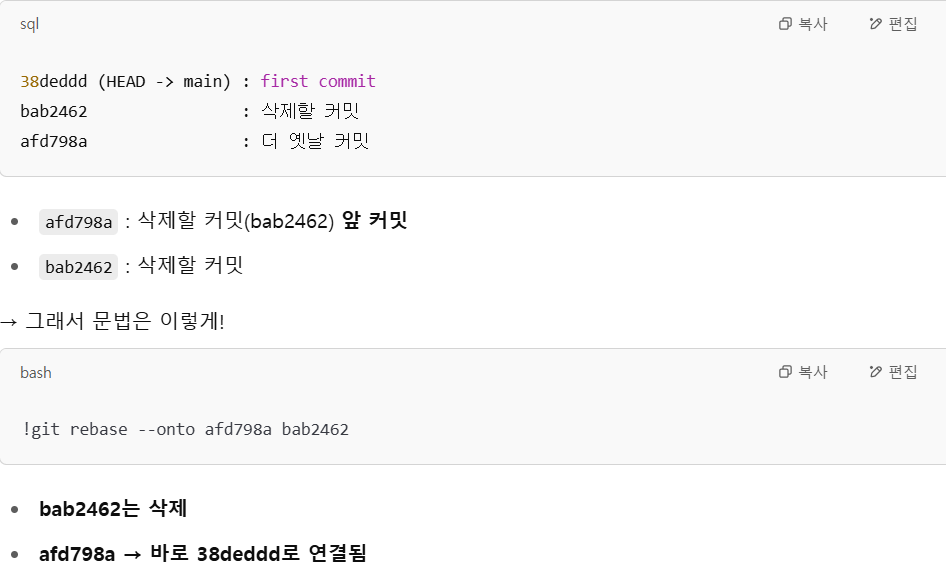


#**경로 이동하기**

In [32]:
%cd /content/drive/MyDrive/Colab Notebooks/Github/colabforAI


/content/drive/MyDrive/Colab Notebooks/Github/colabforAI




```
# 코드로 형식 지정됨
```

# **git 커밋하기**

In [33]:
!git add .
!git commit -m "First commit2"
!git push origin main

[main db9bc6c] First commit2
 1 file changed, 1 insertion(+)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 88.79 KiB | 3.86 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/jwahyunkim/colabforAI.git
   41fcef6..db9bc6c  main -> main


#**전체 흐름**  
[1] PyTorch 설치  
 → [2] 신경망 모델 만들기  
 → [3] MNIST 데이터 불러오기  
 → [4] 모델 학습시키기  
 → [5] 모델 정확도 테스트  



# **기본 틀 만들기**

**1. 필요한 라이브러리 가져오기**   
신경망을 "쉽고 정확하게" 만들고, "학습"시키려면 아래 3개 모듈이 필수.

In [ ]:
import torch
import torch.nn as nn #신경망 부품(Layer, 활성화 함수 등) 제공. → 일일이 수식 짤 필요 없이 편리하게 사용.
import torch.optim as optim # 학습할 때 가중치(weight)를 자동으로 수정하는 방법(Optimizer) 제공.


**2. 신경망 모델 설계**
**3. 신경망 안에 층 정의**

SimpleNN이라는 신경망 설계도 만들기 시작.

```
---파이썬 상속 참조---
# 부모 클래스
class Animal:
    def eat(self):
        print("먹고 있어요.")

# 자식 클래스
class Dog(Animal):
    def bark(self):
        print("멍멍 짖어요.")

# 객체 만들기
dog = Dog()

# 부모 기능 사용
dog.eat()

# 자식 기능 사용
dog.bark()  
--------------------
```


**4. 데이터가 흐르는 경로 설정**

x = x.view(-1, 28*28)  
→ 2D 이미지를 1D(784)로 펼침.  
→ 왜? Linear 레이어는 벡터 입력만 받기 때문.  
// batch : 한 번에 모델에 넣을 데이터 묶음  
// batch_size : 그 묶음 안에 몇 개 데이터가 들어가는지

x = torch.relu(self.fc1(x))  
→ 첫 번째 선형 변환 후, ReLU 활성화 적용.  
→ 왜? 비선형성(직선이 아닌 복잡한 계산)을 추가해서 더 복잡한 문제를 풀 수 있게.

x = self.fc2(x)  
→ 두 번째 선형 변환으로 10개 클래스 결과값(로짓) 생성.

return x  
→ 최종 결과 출력.


In [ ]:
##신경망 안에 층 정의

class SimpleNN(nn.Module): # nn.Module을 상속받아야 PyTorch에서 "모델"로 인식함.
  def __init__(self):
    super(SimpleNN, self).__init__() # 부모 클래스 초기화 -> super().__init__()  이렇게 써도 됨
    self.fc1 = nn.Linear(28*28, 128) # 784개(28x28 이미지)를 128개 특징(feature)로 변환하는 선형 변환층 (Fully Connected Layer)
    self.fc2 = nn.Linear(128,10) # 128개 특징을 10개(클래스 수)로 다시 변환.

## 데이터가 흐르는 경로 설정

  def forward(self, x): # 신경망에 **데이터(x)**를 넣었을 때 어떻게 처리할지 정하는 함수.,forward 이름이어야 PyTorch가 인식함.
    x = x.view(-1, 28*28) # (batch_size, 28*28) 형태로 2차원 평평하게 펴줌
    x = torch.relu(self.fc1(x))
    # self.fc1(x)는 첫 번째 층 통과 → 계산된 숫자가 나옴.
    # torch.relu()는 ReLU 활성화 함수를 씌움.
    # **ReLU(Rectified Linear Unit)**는 0보다 작은 값은 모두 0으로 만들고, 0 이상은 그대로 둠
    x = self.fc2(x) # 두 번째 층 통과

    return x # 최종 결과를 출력(return)(예측값이 들어 있음)


**5. 모델 인스턴스 만들기**

In [ ]:
model = SimpleNN()

**6. 손실 함수와 최적화 방법 정하기**      

**손실함수**

분류 문제(0~9 숫자 맞추기)에 맞는 손실 함수 선택.  
CrossEntropyLoss: 모델 출력(로짓)을 확률처럼 변환 후, 정답과 비교해서 손실 계산.
  
**Why?**  
정답(클래스)과 예측(로짓) 차이를 수치로 알려줘야 학습할 수 있음.  
정확히 맞출수록 손실이 작아짐 → 모델이 잘 학습됐다는 뜻.  

**최적화 방법 설정**  
최적화 = "가중치를 좋은 방향으로 수정하는 방법"    
신경망은 처음에 가중치(weight)가 랜덤임 → 엉터리 예측.  
그래서 학습하면서 "손실(loss)을 줄이는 방향"으로 가중치를 조금씩 바꿔야 함.  
Adam Optimizer를 사용해 가중치를 업데이트할 방법 설정.  
model.parameters() : 모델 안 가중치들 다 가져오기.  
lr=0.001 : 학습률(learning rate). → 얼마나 크게 가중치를 수정할지 결정.  
  
**Why?**  
손실값을 줄이기 위해, 가중치를 잘 수정해줘야 함.  
Adam은 자동으로 학습률을 조정해서 안정적이고 빠르게 학습할 수 있음.

In [ ]:
criterion = nn.CrossEntropyLoss() # 틀린 정도 + 확신의 정도까지 계산해서 정확하게 평가
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **MNIST 데이터 불러오기**

**1. 필요한 라이브러리 가져오기**  
(1) torchvision
정의: 이미지 데이터셋, 변환기, 유명한 사전학습 모델을 모아놓은 PyTorch 부속 라이브러리.  

대표 데이터셋: MNIST, CIFAR-10, ImageNet 등.  
대표 기능: datasets, models, transforms.

➔ 왜 필요?
손글씨 이미지 같은 표준 데이터셋을 직접 다운로드하고 파일 열 필요 없이 바로 가져올 수 있음.

(2) torchvision.transforms
정의: 이미지를 숫자(Tensor)로 변환하거나, 크기 조정, 회전 같은 전처리를 자동으로 해주는 기능.

대표 예시: ToTensor(), Normalize(), Resize()

➔ 왜 필요?
컴퓨터는 "숫자"만 이해함 → 이미지를 수치로 변환해야 신경망에 넣을 수 있음.


(3) torch.utils.data.DataLoader
정의: 데이터를 "묶음(batch)" 단위로 나누고, 순서 섞기(shuffle) 등을 자동으로 해주는 클래스.

주요 옵션: batch_size, shuffle, num_workers

➔ 왜 필요?
한 번에 하나씩 주면 느림 → 여러 개(batch)로 묶어 빠르게 학습해야 함.
또한 shuffle을 통해 "학습이 편향되지 않게" 랜덤하게 데이터를 섞을 수 있음.

In [ ]:
import torchvision #	유명한 이미지 데이터셋과 모델 제공
import torchvision.transforms as transforms # 이미지 변환 도구 제공 why? -> 이미지 전처리(크기변경, 정규화 등)시 필요함
from torch.utils.data import DataLoader # 데이터를 배치(batch)로 묶어주는 기능 제공 why? -> 학습할 때 한번에 여러 데이터를 주려고

**2. 데이터 변환기 정의하기**

**이미지를 숫자(텐서)로 변환**, 컴퓨터가 그림을 **"숫자 배열"**로 읽을 수 있게 만듦  
  
이미지	빨강(R), 초록(G), 파랑(B) 3개 값으로 픽셀 하나 표현  
일반 픽셀 값	0 ~ 255 사이 숫자  
ToTensor()	픽셀 값들을 0~1 사이 숫자로 나누고, 3차원 배열로 변환 (채널, 세로, 가로 순서)
  

■ 변환 과정

예를 들어
(세로 28, 가로 28)짜리 흑백 이미지라면:

1. 원래 데이터
 *   각 픽셀값: 0~255 숫자
2. ToTensor 적용
 *   각 픽셀값 ÷ 255
 *   결과: 0~1 사이 소수점 값
 *   형태: (1, 28, 28) 크기의 텐서 (1은 채널 수)






In [ ]:
transform = transforms.ToTensor()

**3. MNIST 데이터셋 불러오기**  

root='./data'	데이터를 저장할 폴더 지정  
train=True	학습용 데이터셋 (60,000개) 불러오기  
train=False	테스트용 데이터셋 (10,000개) 불러오기  
download=True	없으면 인터넷에서 다운로드  
transform=transform	불러온 이미지를 Tensor로 변환  

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.91MB/s]


**4. 데이터 로더(DataLoader) 만들기**  
DataLoader : 데이터를 묶어서 주고받는 역할.  
DataLoader는 이터러블(iterable)이면서, 내부적으로 이터레이터(iterator)를 만들어서 next()로 배치(batch)를 꺼낼 수 있는 구조야.

**옵션	의미**  
dataset	사용할 데이터셋 지정  
batch_size=64	64개씩 묶어서 모델에 줌  
shuffle=True	학습할 때 매번 데이터 섞기  
shuffle=False	테스트할 때는 순서대로 (일관성 있게)  


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# **모델 학습시키기**

1. 학습 횟수 설정  
한 번 train_loader를 전부 학습하는 걸 "1 에폭(epoch)"이라고 부름.

In [ ]:
# 학습 시작
epochs = 5  # 몇 번 반복할지 (5번)
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # 1. 모델 초기화
        optimizer.zero_grad()

        # 2. 예측
        outputs = model(images)

        # 3. 손실(loss) 계산
        loss = criterion(outputs, labels)

        # 4. 역전파(backpropagation)
        loss.backward()

        # 5. 파라미터 업데이트
        optimizer.step()

        running_loss += loss.item()

    print(f"🌟 Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ 모델 학습 완료!")


🌟 Epoch 1/5, Loss: 0.3448
🌟 Epoch 2/5, Loss: 0.1583
🌟 Epoch 3/5, Loss: 0.1117
🌟 Epoch 4/5, Loss: 0.0849
🌟 Epoch 5/5, Loss: 0.0674
✅ 모델 학습 완료!


# **모델 성능 테스트**



In [ ]:
correct = 0
total = 0

# 모델 평가 모드로 전환
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ 테스트 정확도: {accuracy:.2f}%")


✅ 테스트 정확도: 97.53%


In [ ]:
# 1) 폰트 설치 (이미 했더라도 안전하게 한 번 더)
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 2) 캐시 리셋 (폰트 목록 다시 스캔)
!fc-cache -fv                   # ← 시스템 폰트 캐시 재생성

# ------- 여기서 런타임(세션) **재시작** --------
# Colab 메뉴: Runtime ▸ Restart runtime

# 3) 재시작 후 파이썬 코드
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 한글 폰트 이름 확인
for f in fm.fontManager.ttflist:
    if "Nanum" in f.name:
        print(f.name)           # 예: 'NanumGothic'

# 4) 한글 폰트 적용
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


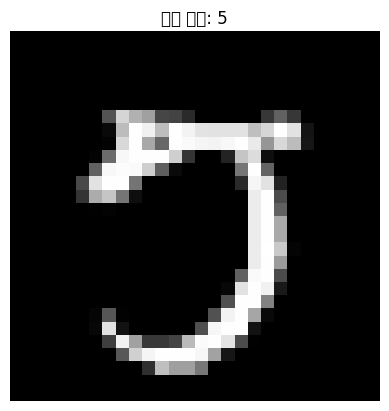

🧠 모델 예측: 7


In [ ]:
# ────────────────────────────────────────────────
# 1. (코랩 전용) 한글 폰트 설치 ─ 처음 한 번만 실행
# ────────────────────────────────────────────────
!apt-get update -qq
!apt-get install -qq fonts-nanum

# ────────────────────────────────────────────────
# 2. 파이썬 코드: 폰트 적용 + 랜덤 이미지 출력·예측
# ────────────────────────────────────────────────
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import torch, random

# 2-1. 한글 폰트 설정 (설치된 NanumGothic 사용)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 2-2. 테스트 데이터에서 ‘배치·이미지’ 둘 다 랜덤 선택
examples     = list(test_loader)                       # 전체 배치를 리스트화
batch_idx    = random.randint(0, len(examples) - 1)    # 랜덤 배치
example_data, example_targets = examples[batch_idx]

sample_idx   = random.randint(0, len(example_data) - 1)  # 배치 안 랜덤 이미지

# 2-3. 이미지 화면에 띄우기
plt.imshow(example_data[sample_idx][0], cmap='gray')
plt.title(f"실제 정답: {example_targets[sample_idx].item()}")
plt.axis('off')
plt.show()

# 2-4. 모델 예측
model.eval()
with torch.no_grad():
    output     = model(example_data[sample_idx].unsqueeze(0))  # 배치 차원 추가
    _, pred    = torch.max(output, 1)
    print(f"🧠 모델 예측: {pred.item()}")
